In [9]:
import os
import sys
os.path.expanduser("~")

'C:\\Users\\anna4'

In [10]:
os.path.join(os.path.expanduser("~"), 'spark-2.0.0-bin-hadoop2.7')

'C:\\Users\\anna4\\spark-2.0.0-bin-hadoop2.7'

In [11]:
import findspark
findspark.init(os.path.join(os.path.expanduser("~"), 'spark-2.0.0-bin-hadoop2.7'))
findspark.find()

'C:\\Users\\anna4\\spark-2.0.0-bin-hadoop2.7'

In [21]:
import os
import sys

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [12]:
# python 라이브러리 경로가 잘 추가되었는지 출력해서 확인하기
for i in sys.path:
    print i

C:\Users\anna4\spark-2.0.0-bin-hadoop2.7\python
C:\Users\anna4\spark-2.0.0-bin-hadoop2.7\python\lib\py4j-0.10.1-src.zip

C:\Users\anna4\Anaconda3\envs\py27\python27.zip
C:\Users\anna4\Anaconda3\envs\py27\DLLs
C:\Users\anna4\Anaconda3\envs\py27\lib
C:\Users\anna4\Anaconda3\envs\py27\lib\plat-win
C:\Users\anna4\Anaconda3\envs\py27\lib\lib-tk
C:\Users\anna4\Anaconda3\envs\py27
C:\Users\anna4\Anaconda3\envs\py27\lib\site-packages
C:\Users\anna4\Anaconda3\envs\py27\lib\site-packages\win32
C:\Users\anna4\Anaconda3\envs\py27\lib\site-packages\win32\lib
C:\Users\anna4\Anaconda3\envs\py27\lib\site-packages\Pythonwin
C:\Users\anna4\Anaconda3\envs\py27\lib\site-packages\IPython\extensions
C:\Users\anna4\.ipython


In [13]:
# SparkSession 생성하기
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config('spark.sql.warehouse.dir', 'C:\Users\anna4\Code\bigdata\mini_project')\
    .getOrCreate()

print spark.version
print spark.conf.get('spark.app.name')
print spark.conf.get('spark.master')
print spark.conf.get('spark.driver.host')

2.0.0
myApp
local
192.168.55.184


In [14]:
# 파일에서 rdd 만들기

myRdd=spark.sparkContext.textFile("naver_blog_dessert_contents.json")
myRdd.take(20)

[u'\u200b\u200b\u200b\ub354 \ucd94\uc6cc\uc9c0\uae30 \uc804\uc5d0 \ud0dc\ub9b0\uc774\uc640 \ub370\uc774\ud2b8\ub97c \ud558\ub7ec \ub0a8\uc591\uc8fc \ub514\uc800\ud2b8\uce74\ud398 \ub77c\ube0c\ub9ac\uc988\uc5d0 \ub2e4\ub140\uc654\uc5b4\uc694.\uad11\ub989\uc218\ubaa9\uc6d0\uc5d0 \uc704\uce58\ud558\uace0 \uc788\uc5b4\uc11c \uac00\uc744\uc774 \ub05d\ub098\uae30 \uc804\uc5d0 \uc544\uc9c1\uc740 \ub0a8\uc544\uc788\ub294 \ub178\ub797\uace0 \ube68\uac04 \ub098\ubb34\ub4e4\uc744 \uc544\uc9c1 \ubcfc \uc218 \uc788\ub294 \uacf3\uc774\uc9c0\uc694.\u200b\u200b',
 u'',
 u' ',
 u'',
 u'',
 u' ',
 u' ',
 u'',
 u'\u200b\u200b\uc694\uc998 \ub098\uc758 \uc0ac\ub791\uc744 \ub3c5\ucc28\uc9c0 \ud558\uace0 \uc788\ub294 \uc6b0\ub9ac \ud0dc\ub9b0\uc774.\uc774 \uc544\uc774\uc640 \ud568\uaed8 \ud558\ub294 \uc2dc\uac04\ub4e4\uc774 \uc694\uc998 \uc800\uc5d0\uac8c \ud790\ub9c1\uc744 \uc90d\ub2c8\ub2e4.\uc5b4\uca5c \ub9d0\ub3c4 \uc870\uadfc\uc870\uadfc \uc798\ud558\ub294\uc9c0 \ub300\ud654\ub3c4 \uc990\uac70\uc6cc\uc9

In [8]:
# 디저트 단어가 들어간 line이 몇줄인지 세보기

myRdd_spark=myRdd.filter(lambda line: u"디저트" in line)
print "How many lines having 디저트: ", myRdd_spark.count()

How many lines having 디저트:  2


In [15]:
# 정규표현식으로 특수문자 제거하기

import re

lines=myRdd.collect()
pattern='[,|.|"|!|@|#|$|%|^|&|*|(|)|?|/|\n]'
repl=' '

clean_text=list()
for i in lines:
    text=re.sub(pattern=pattern, repl=repl, string=i)
    clean_text.append(text)
print type(clean_text)
#     print text

<type 'list'>


In [16]:
# 정규표현식으로 한글만 남기기

clean_text2=list()
for i in clean_text:
    text = re.compile('[ㅣㄱ-ㅎ|ㅏ-ㅣ]+')
    result=text.sub(' ', i)
    clean_text2.append(result)
print type(clean_text2)
# print clean_text2

<type 'list'>


In [17]:
# 정규표현식으로 영어, 숫자 제거하기

clean_text3=list()
for i in clean_text2:
    text = re.compile('[a-z|A-Z|0-9]+')
    result=text.sub(' ', i)
    clean_text3.append(result)
    
print type(clean_text3)
# print clean_text3

<type 'list'>


In [18]:
# 특수문자 제거한 리스트를 rdd로 만들기

myRddReg=spark.sparkContext.parallelize(clean_text3)
# myRddReg.take(10)
for words in myRddReg.take(30):
    print words,

​​​더 추워지기 전에 태린이와 데이트를 하러 남양주 디저트카페 라브리즈에 다녀왔어요 광릉수목원에 위치하고 있어서 가을이 끝나기 전에 아직은 남아있는 노랗고 빨간 나무들을 아직 볼 수 있는 곳이지요 ​​           ​​요즘 나의 사랑을 독차지 하고 있는 우리 태린이 이 아이와 함께 하는 시간들이 요즘 저에게 힐링을 줍니다 어쩜 말도 조근조근 잘하는지 대화도 즐거워지는 말동무가 되네요 ​​                 ​매장은  층  층  루프탑까지 있어층마다 컨셉이 조금씩 달랐는데요 우선  층은 귀여운 인테리어로 우리 태린이의 취향을 저격하였지요  귀여운 고양이다   동물을 좋아하는 아이여서 그런지 더 마음에 들었나봐요 ​​           ​​싸늘한 날씨였기에 아이의 몸을 따뜻하게 해줄 초코 코코아 한잔과장거리 운전을 하고 온지라 커피수혈이 필요했던 저는 아이스플랫화이트를 주문했어요 ​​ 


In [19]:
# stopwords 제거하기

stopwords=list()
stopwords_k=[u'더', u'그런지']
stopwords_u=[u'', u' ', u':', u'-', u'\uc798', u'\u200b', u'\u200b\u200b', u'\u200b\u200b\u200b', u'\u200b\u200b\u200b\u200b', u'\u200b\u200b\u200b\u200b\u200b']
stopwords_o=[' ']

for e in stopwords_k:
    stopwords.append(e) 
for e in stopwords_u:
    stopwords.append(e)
for e in stopwords_o:
    stopwords.append(e)     

myRdd_stop=myRddReg.flatMap(lambda x:x.split())\
    .filter(lambda x:x.lower() not in stopwords)

# 잘 제거되었는지 출력해서 확인
for words in myRdd_stop.take(50):
    print words,    
    

​​​더 추워지기 전에 태린이와 데이트를 하러 남양주 디저트카페 라브리즈에 다녀왔어요 광릉수목원에 위치하고 있어서 가을이 끝나기 전에 아직은 남아있는 노랗고 빨간 나무들을 아직 볼 수 있는 곳이지요 ​​요즘 나의 사랑을 독차지 하고 있는 우리 태린이 이 아이와 함께 하는 시간들이 요즘 저에게 힐링을 줍니다 어쩜 말도 조근조근 잘하는지 대화도 즐거워지는 말동무가


In [20]:
# 형태소 분석기 호출-꼬꼬마 
# 명사만 남기기

from konlpy.tag import Kkma
kkma=Kkma()

# 형태소 분석해 명사만 남기기
# texts=[u'이것은 형태소 분석기 입니다 아버지가방에들어가신다']
texts=myRdd_stop.collect()
tokens = list()
for text in texts:
    tokens += kkma.nouns(text)

# print(tokens)
print("DONE")


DONE


In [2]:
# 형태소 분석기 호출-꼬꼬마 
# 명사만 남기기

from konlpy.tag import Kkma
kkma=Kkma()

texts=[u'이것은 형태소 분석기입니다 아버지가방에들어가신다']
tokens = list()
for text in texts:
    tokens += kkma.nouns(text)

print(tokens)


[u'\uc774\uac83', u'\ud615\ud0dc\uc18c', u'\ubd84\uc11d\uae30', u'\uc544\ubc84\uc9c0', u'\uc544\ubc84\uc9c0\uac00\ubc29', u'\uac00\ubc29']


# 디저트 단어만 골라내기 전 분석

In [22]:
# 단어 빈도 세기
myRddNouns=spark.sparkContext.parallelize(tokens)


wc=myRddNouns\
    .flatMap(lambda x:x.split(" "))\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1], x[0]))\
    .sortByKey(False)\
    .take(50)

# for i in wc:
#     print i,

In [23]:
print len(myRddNouns.collect())

312252


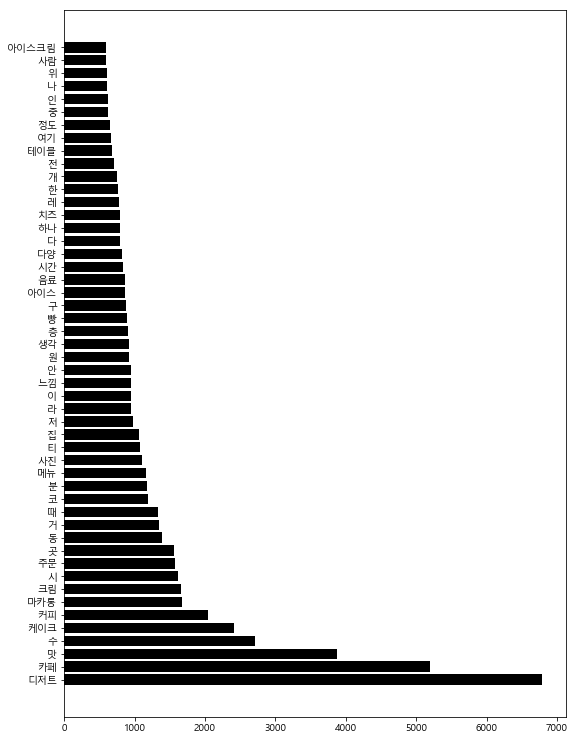

In [87]:
# 그래프에 한글이 출력되도록 폰트설정

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 단어별 빈도수 그래프로 그리기

% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

count = map(lambda x: x[0], wc)
word = map(lambda x: x[1], wc)

# 그래프 전체 크기 설정
# plt.figure(num=None, figsize=(8,10), facecolor='w', edgecolor='k')
plt.figure(num=None, figsize=(9,13))
plt.barh(range(len(count)), count, color = 'black') 
plt.yticks(range(len(count)), word)
plt.show()

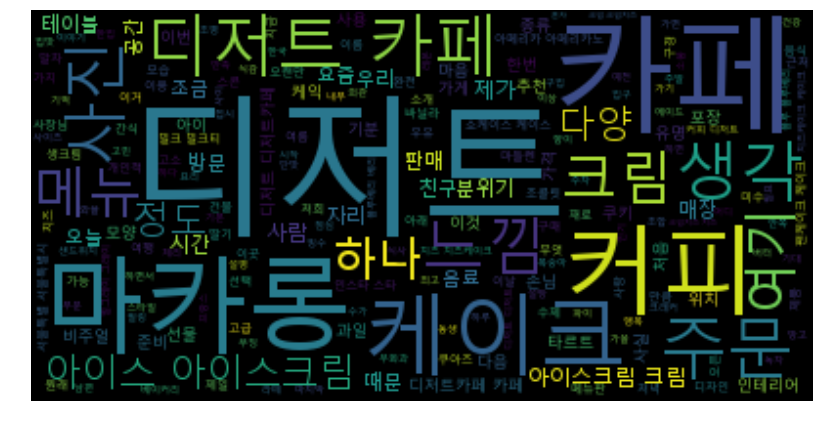

In [93]:
# 워드클라우드로 표현
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='black',
    max_words=200
).generate(' '.join(tokens))

plt.figure(num=None, figsize=(14,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 디저트 관련 단어만 골라낸 후 분석

In [24]:
# 디저트에 해당하는 단어만 뽑기

# text=myRdd_stop.collect()
text=tokens
text_str=' '.join(text)  #split하기 위해서 str으로 만들기

print type(text_str)
# print text_str

<type 'unicode'>


In [25]:
# 디저트 목록 만들기

keywords=[u"초코", u"초콜릿", u"초콜렛", u"초코렛", u"딸기", u"체리", u"레몬", u"복숭아", u"망고", u"자몽", u"체리", u"오렌지", u"화이트초코", u"초코칩", u"블루베리", u"라즈베리", u"블랙베리", u"생딸기", u"무지개", u"연유", u"고구마", u"자색고구마", u"땅콩", u"피넛버터", u"피넛버터크림", u"아몬드", u"호두", u"인절미", u"흑임자", u"쑥", u"팥", u"오레오", u"말차", u"녹차", u"민트", u"민트초코", u"치즈", u"쌀", u"레드벨벳", u"쿠앤크", u"가나슈", u"딸기우유", u"순수우유", u"솔티드캬라멜", u"솔티드카라멜", u"바닐라", u"요거트", u"흑당", u"브라운슈가", u"브라운슈거", u"누가크래커", u"마카롱", u"젤리", u"제리", u"도넛", u"도너츠", u"아이스크림", u"아이스크림케이크", u"아이스크림케잌", u"커피", u"라떼", u"아이스아메리카노", u"카페라떼", u"바날리라떼", u"우유", u"생딸기라떼", u"티", u"밀크티", u"블랙밀크티", u"타로밀크티", u"말차밀크티", u"녹차밀크티", u"차", u"버블티", u"흑당버블티", u"리얼딸기라떼", u"에이드", u"청포도에이드", u"레몬에이드", u"자몽에이드", u"아이스티", u"복숭아아이스티", u"레몬아이스티", u"망고아이스티", u"쿠키", u"에그타르트", u"타르트", u"마들렌", u"파운드케이크", u"파이", u"와플", u"핫도그", u"치즈케이크", u"치즈케잌", u"푸딩", u"크레이프", u"크레이프케이크", u"크레이프케잌", u"티라미수", u"티라미슈", u"쉬폰케이크", u"쉬폰케잌", u"애프터눈티", u"파르페", u"팬케이크", u"팬케잌", u"수플레팬케이크", u"수플레", u"카스테라", u"롤케이크", u"롤케잌", u"컵케이크", u"컵케잌", u"다쿠아즈", u"빵", u"브레드", u"호떡", u"붕어빵", u"머랭", u"머랭쿠키", u"빙수", u"마시멜로우", u"머핀", u"브라우니", u"젤라또", u"허니브래드", u"휘핑크림", u"오메기떡", u"약과", u"달고나"]
# dessertRdd=spark.sparkContext.textFile("dessert_list3.txt")
# keywords=dessertRdd.map(lambda x:x.split(" ")).collect()
# print keywords[10]
print len(keywords)
# print keywords

words_list=text_str.split(" ")
# print words_list
print len(words_list)



130
312252


In [26]:
# 디저트 목록이 잘 만들어졌나 확인

print type(keywords)
print keywords[0]

<type 'list'>
초코


In [27]:
yes=list()  #본문에서 디저트 단어만 뽑은 결과
count=0

for i in words_list:
    if i in keywords:
        yes.append(i)
        count+=1
#         print i
#         print count


In [98]:
for i in yes:
    print i

print type(yes)

커피
커피
컵케이크
마카롱
컵케이크
치즈
아몬드
아몬드
커피
커피
컵케이크
컵케이크
컵케이크
컵케이크
커피
커피
커피
빵
빵
약과
약과
약과
커피
약과
약과
약과
약과
커피
커피
약과
약과
약과
약과
약과
약과
약과
약과
쿠키
녹차
아이스크림
아이스크림
녹차
아이스크림
녹차
녹차
아이스크림
아이스크림
녹차
아이스크림
커피
라떼
밀크티
티
아이스크림
녹차
블루베리
아이스크림
녹차
녹차
아이스크림
녹차
녹차
녹차
망고
요거트
치즈
아이스크림
녹차
아이스크림
아이스크림
아이스크림
아이스크림
아이스크림
밀크티
티
티
티라미슈
녹차
녹차
말차
치즈
티
치즈
치즈케이크
초콜릿
쿠키
녹차
치즈
녹차
아이스크림
아이스크림
녹차
아이스크림
아이스크림
녹차
아이스크림
녹차
녹차
녹차
녹차
빵
빵
커피
빵
커피
빵
커피
커피
에그타르트
우유
바닐라
에그타르트
빵
빵
쿠키
빵
빵
쿠키
빵
치즈
초콜렛
우유
고구마
빵
빵
차
빵
망고
망고
망고
망고
아이스크림
커피
파이
마카롱
와플
티
티
마카롱
크레이프
초콜렛
치즈
치즈
티
딸기
마카롱
우유
마카롱
딸기
마카롱
치즈
크레이프
녹차
티
와플
커피
마카롱
마카롱
마카롱
쿠키
마카롱
초콜릿
바닐라
마카롱
마카롱
마카롱
마카롱
마카롱
라떼
마카롱
치즈
바닐라
라즈베리
딸기
요거트
인절미
말차
치즈
마카롱
마카롱
인절미
마카롱
아몬드
딸기
요거트
요거트
마카롱
마카롱
아몬드
요거트
딸기
딸기
마카롱
마카롱
마카롱
커피
커피
커피
커피
에이드
차
바닐라
쿠키
마카롱
마카롱
초콜릿
초콜릿
초콜릿
딸기
바닐라
커피
딸기
딸기
쿠키
초콜릿
딸기
아몬드
마카롱
빵
쌀
우유
푸딩
아이스크림
푸딩
아이스크림
아이스크림
아이스크림
아이스크림
아이스크림
아이스크림
아이스크림
연유
망고
딸기
망고
젤리
망고
티
커피
티
마카롱
커피
초콜렛
티
복숭아
복숭아
복숭아
커피
복숭아
커피
말차
마들렌
티
커피
티
딸기
치즈
타르트
수플레
흑임자
마카롱
밀크티
티
말차
말차
말차
타르트
타르트
레몬
흑임자
치즈
고구마
바닐라
치즈
수플레
티
티
티
초콜릿
딸기
흑임

도넛
도넛
도넛
도넛
도넛
도넛
도넛
도넛
도넛
말차
인절미
땅콩
도넛
도넛
도넛
도넛
인절미
땅콩
말차
도넛
빵
인절미
인절미
인절미
인절미
도넛
땅콩
땅콩
땅콩
도넛
도넛
도넛
빵
도넛
도넛
도넛
도넛
도넛
도넛
커피
레몬
레몬
레몬
딸기
딸기
타르트
딸기
딸기
파르페
바닐라
딸기
파르페
딸기
치즈
타르트
초코
바닐라
딸기
딸기
딸기
딸기
딸기
커피
티
요거트
요거트
티
티
라떼
흑당
커피
티
라떼
라떼
차
마카롱
타르트
마카롱
마카롱
레몬
타르트
치즈
치즈
치즈
치즈
커피
커피
커피
커피
민트
커피
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
밀크티
티
밀크티
티
마카롱
마카롱
티
우유
딸기
딸기우유
바닐라
말차
복숭아
요거트
마카롱
커피
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
자색고구마
고구마
아이스크림
아이스크림
아이스크림
고구마
아이스크림
고구마
고구마
아이스크림
아이스크림
고구마
아이스크림
아이스크림
아이스크림
아이스크림
자색고구마
고구마
고구마
아이스크림
고구마
아이스크림
머핀
도넛
젤리
초코
라즈베리
치즈
차
커피
초콜릿
오렌지
오렌지
빵
타르트
초콜릿
초콜렛
커피
초콜릿
제리
커피
커피
초콜릿
커피
커피
커피
초콜릿
초콜릿
초콜릿
커피
초콜릿
초콜릿
빵
빵
타르트
치즈
커피
차
우유
커피
우유
빵
에그타르트
에그타르트
빵
빵
빵
쿠키
빵
타르트
빵
빵
치즈
치즈
빵
치즈
치즈
치즈케이크
레몬
치즈
치즈
치즈
빵
빵
빵
초콜릿
초콜릿
커피
에이드
마카롱
초콜릿
차
티
티
티
티
치즈
치즈
티
차
흑당
흑당버블티
티
차
오렌지
티
티
라떼
흑당
버블티
티
티
티
밀크티
티
티
밀크티
티
에이드
커피
흑당
버블티
티
레몬
녹차
흑당
에이드
티
에이드
녹차
라떼
흑당
흑당
레몬
레몬
에이드
에이드
티
티
레몬
레몬
레몬
흑당
흑당
우유
라떼
흑당
에이드
에이드
커피
에이드
커피
녹차
녹차
녹차
차
티
티
티
말차
커피
티
티
머핀
머핀
푸딩
푸딩
라떼
차
머핀
쑥
타르트
아이스크림
아이스크림
아이스크림
빵
커피
바닐라
아이스크림
빵
차
차


복숭아
젤리
복숭아
복숭아
젤리
복숭아
복숭아
복숭아
복숭아
복숭아
복숭아
푸딩
푸딩
복숭아
복숭아
복숭아
요거트
젤리
복숭아
요거트
푸딩
푸딩
복숭아
차
커피
차
커피
차
쿠키
빙수
쌀
붕어빵
커피
인절미
고구마
치즈
빙수
쌀
커피
커피
차
인절미
빙수
치즈
차
치즈
빵
커피
딸기
녹차
커피
커피
커피
커피
딸기
녹차
딸기
녹차
커피
커피
커피
커피
커피
커피
녹차
커피
커피
커피
커피
커피
마카롱
커피
커피
브라우니
빵
커피
커피
마카롱
커피
쿠키
쿠키
마카롱
호두
빵
차
빵
티
티
요거트
젤리
쿠키
타르트
도너츠
마카롱
타르트
초코렛
초콜렛
초코렛
망고
빵
빵
빵
빵
레몬
커피
빵
커피
라즈베리
빵
파이
커피
커피
커피
커피
커피
커피
커피
롤케잌
치즈
치즈
바닐라
카스테라
카스테라
카스테라
카스테라
카스테라
카스테라
요거트
타르트
요거트
바닐라
바닐라
바닐라
커피
커피
커피
커피
커피
커피
커피
커피
커피
티
티라미슈
커피
커피
커피
커피
흑당
흑당버블티
티
티
티라미슈
흑당
흑당버블티
티
흑당
흑당버블티
티
커피
흑당
흑당버블티
티
버블티
티
버블티
티
커피
흑당
흑당버블티
티
커피
커피
흑당
흑당버블티
티
버블티
티
커피
흑당
흑당버블티
티
흑당
흑당버블티
티
흑당
흑당버블티
티
블루베리
커피
커피
커피
버블티
티
버블티
티
커피
커피
빙수
빙수
빙수
타르트
타르트
블루베리
타르트
빵
타르트
블루베리
타르트
라즈베리
마카롱
커피
초콜릿
바닐라
초콜릿
수플레
빵
빵
빵
커피
호두
빵
도넛
딸기
에그타르트
빵
타르트
빵
빵
빵
빵
마들렌
빵
마카롱
마들렌
마들렌
마들렌
바닐라
마들렌
레몬
마카롱
마들렌
빵
마들렌
마들렌
우유
바닐라
마카롱
마카롱
마들렌
마들렌
수플레
팬케이크
수플레
팬케이크
수플레
팬케이크
딸기
수플레
수플레
수플레
팬케이크
팬케이크
딸기
팬케이크
에이드
에이드
수플레
수플레
팬케이크
팬케이크
수플레
팬케이크
수플레
팬케이크
팬케이크
수플레
딸기
팬케이크
수플레
팬케이크
에이드
수플레
팬케이크
수플레
팬케이크
빵
빵
수플레
팬케이크
수

커피
커피
커피
커피
커피
커피
커피
커피
커피
커피
고구마
커피
빵
커피
커피
커피
커피
치즈
치즈케이크
치즈
복숭아
커피
치즈
커피
커피
치즈
치즈
치즈
커피
커피
커피
연유
커피
치즈
치즈
아이스크림
치즈
치즈케이크
치즈
치즈
치즈
치즈케이크
커피
치즈
민트
우유
민트
커피
민트
민트
복숭아
치즈
치즈
치즈
치즈
치즈
아이스크림
치즈
치즈
치즈
치즈
치즈케이크
치즈
빵
타르트
복숭아
라즈베리
티
레몬
빵
타르트
커피
마카롱
마카롱
마카롱
마카롱
커피
마카롱
커피
커피
마카롱
마카롱
마카롱
마카롱
커피
마카롱
커피
차
마카롱
버블티
티
티
딸기
녹차
흑당
버블티
티
티
커피
커피
커피
커피
초콜릿
마카롱
초콜릿
마카롱
파이
마카롱
쿠키
쿠키
쿠키
마카롱
쿠키
쿠키
쿠키
마카롱
마카롱
마카롱
블루베리
블루베리
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
초콜릿
초콜릿
마카롱
커피
커피
아이스티
커피
커피
커피
커피
초콜릿
파이
커피
커피
커피
아이스티
아이스티
아이스티
커피
커피
초콜릿
커피
티
커피
차
빙수
초콜릿
초코렛
초콜릿
초콜렛
커피
초콜릿
초콜릿
차
차
차
차
차
차
차
차
차
티
와플
와플
와플
와플
와플
흑임자
흑임자
팥
팥
아이스크림
녹차
아이스크림
쌀
아이스크림
아이스크림
인절미
아이스크림
인절미
녹차
녹차
녹차
녹차
아이스크림
녹차
녹차
인절미
와플
와플
와플
와플
와플
치즈
복숭아
와플
커피
아이스크림
커피
커피
커피
커피
커피
커피
쿠키
커피
커피
커피
커피
커피
커피
커피
커피
쿠키
쿠키
커피
커피
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
차
커피
쿠키
치즈
치즈케이크
쿠키
쿠키
쿠키
치즈
치즈케이크
쿠키
쿠키
초콜릿
치즈
쿠키
초콜릿
쿠키
초콜릿
쿠키
쿠키
쿠키
쿠키
쿠키
쿠키
쿠키
쿠키
쿠키
쿠키
초콜릿
쿠키
쿠키
치즈
치즈
치즈케이크
치즈
치즈
치즈케이크
쿠키
치즈
치즈케이크
에이드
바닐라
바닐라
바닐라
바닐라
블루베리
티
망고
바닐라
바닐라
망고
브레드
커피
커피
에이드
레몬
딸기
딸기
커피
녹차


티라미슈
타르트
타르트
복숭아
아몬드
치즈
타르트
민트
레몬
티
복숭아
복숭아
복숭아
초콜릿
바닐라
초콜릿
레몬
티
티
레몬
파이
망고
마카롱
마카롱
마카롱
밀크티
티
밀크티
티
빵
치즈
레몬
레몬
레몬
파이
망고
망고
티
커피
복숭아
레몬
에이드
에이드
타르트
치즈
체리
복숭아
치즈
에이드
타르트
아이스크림
아이스크림
아이스크림
초콜렛
우유
우유
블루베리
파이
우유
블루베리
파이
아이스크림
아이스크림
아이스크림
아이스크림
아이스크림
파이
파이
쑥
라즈베리
파이
빵
파이
레몬
파이
파이
파이
파이
커피
티
커피
딸기
커피
마카롱
차
마카롱
마카롱
마카롱
마카롱
쿠키
마카롱
마카롱
흑당
블루베리
마카롱
흑당
흑당
블루베리
마카롱
마카롱
쌀
무지개
쌀
파이
아이스티
에이드
마카롱
마카롱
마카롱
마카롱
치즈
타르트
롤케이크
티
흑임자
바닐라
녹차
요거트
치즈
딸기
요거트
마카롱
쌀
쿠키
쿠키
마카롱
마카롱
마카롱
마카롱
차
마카롱
마카롱
딸기
마카롱
티
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
마카롱
티
마카롱
마카롱
마카롱
블루베리
요거트
티
치즈
우유
요거트
연유
마카롱
마카롱
커피
커피
커피
핫도그
차
차
차
차
커피
커피
커피
커피
빵
푸딩
쿠키
커피
커피
커피
푸딩
푸딩
푸딩
푸딩
쿠키
빵
브레드
푸딩
체리
체리
체리
복숭아
우유
바닐라
블루베리
라즈베리
우유
바닐라
블루베리
라즈베리
아이스크림
파이
푸딩
빵
체리
체리
복숭아
체리
체리
우유
체리
체리
체리
체리
체리
바닐라
체리
우유
푸딩
우유
우유
우유
체리
커피
차
커피
커피
커피
커피
초콜릿
치즈
치즈
티
머랭
차
티
티
차
타르트
빵
차
빵
빵
마들렌
빵
빵
빵
파이
쿠키
빵
빵
빵
파이
커피
빵
빵
빵
도너츠
도너츠
쿠키
마카롱
롤케이크
빵
빵
커피
커피
커피
커피
커피
커피
마들렌
녹차
빵
티
마들렌
커피
커피
차
쿠키
말차
바닐라
쿠키
쿠키
차
흑임자
차
파이
파이
타르트
차
치즈
치즈
차
마카롱
딸기
치즈
레몬
차
타르트
레몬
타르트
차
망고
차
차
차
타르트
차
말차
타르트
바닐

쿠키
커피
쿠키
티
초콜릿
파이
흑당
티
커피
커피
파이
쿠키
커피
흑당
티
파이
크레이프
우유
흑당
티
흑당
티
흑당
흑당
파이
파이
파이
크레이프
크레이프
딸기
와플
팥
팥
팥
인절미
팥
팥
우유
팥
빵
빵
빵
빵
차
빵
팥
인절미
인절미
인절미
인절미
인절미
인절미
인절미
팥
빵
팥
빵
빙수
빙수
빙수
빵
팥
팥
우유
팥
우유
팥
팥
바닐라
아이스크림
팥
빵
인절미
빵
빵
커피
라떼
티
빵
빵
치즈
치즈케이크
치즈
치즈케이크
치즈
치즈케이크
라떼
커피
파이
마카롱
차
도너츠
도너츠
커피
도너츠
도너츠
도너츠
도너츠
도너츠
도너츠
도너츠
도너츠
도너츠
치즈
인절미
고구마
녹차
치즈
고구마
밀크티
티
도너츠
고구마
팥
도너츠
도너츠
도너츠
도너츠
치즈
도넛
밀크티
티
도너츠
도너츠
커피
에이드
쌀
커피
커피
마들렌
커피
커피
커피
커피
커피
라떼
커피
커피
빵
팥
커피
커피
커피
커피
파운드케이크
복숭아
도넛
라즈베리
복숭아
라떼
빵
빵
흑임자
녹차
라즈베리
도넛
빵
라즈베리
라떼
복숭아
복숭아
빵
복숭아
복숭아
복숭아
복숭아
우유
복숭아
복숭아
제리
제리
우유
제리
제리
제리
제리
제리
바닐라
아이스크림
바닐라
아이스크림
커피
커피
차
차
아이스크림
아이스크림
아이스크림
아이스크림
에그타르트
커피
에그타르트
커피
에그타르트
에그타르트
흑당
흑당
딸기
요거트
망고
요거트
딸기
흑당
흑당
카스테라
딸기
흑당
흑당
딸기
요거트
흑당
흑당
흑당
딸기
카스테라
커피
커피
커피
커피
커피
커피
커피
커피
쑥
말차
커피
바닐라
밀크티
티
티
티라미슈
커피
차
커피
라떼
커피
커피
커피
초코렛
아이스크림
초콜릿
와플
아이스크림
쿠키
도넛
와플
마카롱
커피
마카롱
롤케이크
마카롱
민트
에이드
에이드
복숭아
에이드
에이드
복숭아
에이드
아이스크림
우유
아이스크림
복숭아
에이드
복숭아
에이드
마카롱
마카롱
마카롱
가나슈
쿠키
마카롱
민트
마카롱
마카롱
마카롱
마카롱
마카롱
초콜릿
망고
치즈
초콜릿
치즈
빵
커피
커피
커피
커피
쿠키
치즈
커피
커피
커피
커피
에이드
블루베리


In [28]:
myRdd_dessert=spark.sparkContext.parallelize(yes)
myRdd_dessert.take(5)

[u'\ucee4\ud53c',
 u'\ucee4\ud53c',
 u'\ucef5\ucf00\uc774\ud06c',
 u'\ub9c8\uce74\ub871',
 u'\ucef5\ucf00\uc774\ud06c']

In [29]:
# 단어 빈도 세기

wc=myRdd_dessert\
    .flatMap(lambda x:x.split(" "))\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1], x[0]))\
    .sortByKey(False)\
    .take(50)

for i in wc:
    print i,

(2041, u'\ucee4\ud53c') (1671, u'\ub9c8\uce74\ub871') (1076, u'\ud2f0') (894, u'\ube75') (791, u'\uce58\uc988') (588, u'\uc544\uc774\uc2a4\ud06c\ub9bc') (526, u'\ucc28') (512, u'\ucfe0\ud0a4') (459, u'\ub538\uae30') (423, u'\ud0c0\ub974\ud2b8') (364, u'\uc6b0\uc720') (363, u'\ubc14\ub2d0\ub77c') (358, u'\ud30c\uc774') (317, u'\ucd08\ucf5c\ub9bf') (290, u'\ub808\ubaac') (285, u'\ud478\ub529') (280, u'\uc640\ud50c') (251, u'\ub9d0\ucc28') (244, u'\ub9c8\ub4e4\ub80c') (233, u'\ub9dd\uace0') (230, u'\ub179\ucc28') (208, u'\ubc00\ud06c\ud2f0') (207, u'\ud751\ub2f9') (198, u'\uc5d0\uc774\ub4dc') (183, u'\ud32c\ucf00\uc774\ud06c') (183, u'\ubcf5\uc22d\uc544') (181, u'\ub3c4\ub11b') (180, u'\ube59\uc218') (166, u'\uccb4\ub9ac') (164, u'\uce58\uc988\ucf00\uc774\ud06c') (154, u'\uc300') (154, u'\uc465') (147, u'\ud325') (145, u'\uc778\uc808\ubbf8') (144, u'\ub77c\ub5bc') (134, u'\uc694\uac70\ud2b8') (128, u'\ube14\ub8e8\ubca0\ub9ac') (127, u'\uace0\uad6c\ub9c8') (120, u'\uc218\ud50c\ub808') (111

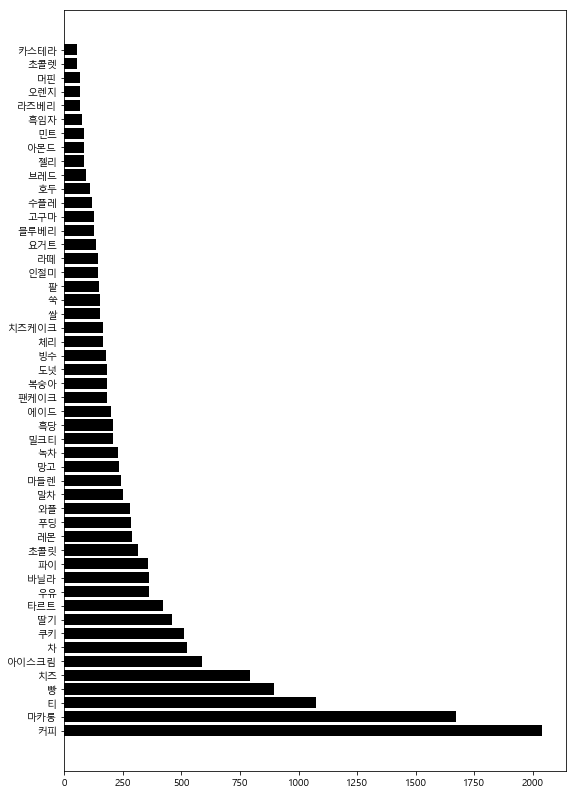

In [101]:
# 그래프에 한글이 출력되도록 폰트설정

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 단어별 빈도수 그래프로 그리기

% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

count = map(lambda x: x[0], wc)
word = map(lambda x: x[1], wc)

# 그래프 전체 크기 설정
# plt.figure(num=None, figsize=(8,10), facecolor='w', edgecolor='k')
plt.figure(num=None, figsize=(9,14))
plt.barh(range(len(count)), count, color = 'black') 
plt.yticks(range(len(count)), word)
plt.show()

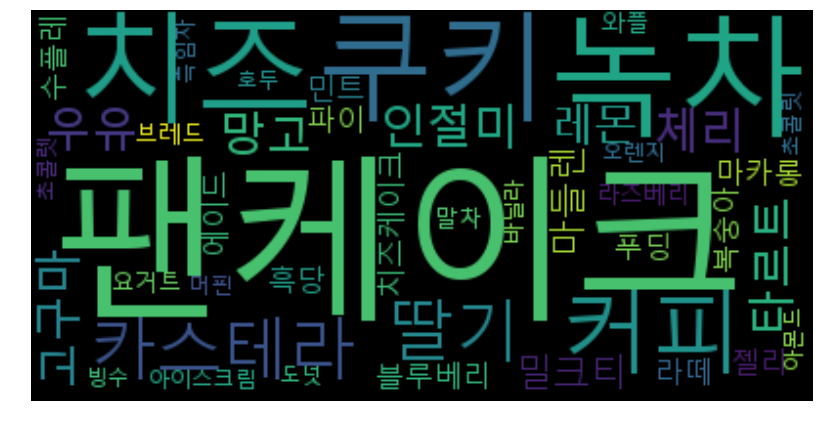

In [124]:
# 워드클라우드로 표현

wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='black',
    max_words=300
).generate(' '.join(word))

plt.figure(num=None, figsize=(14,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()